Import necessary libraries for Machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Import DataSet


In [2]:
df = pd.read_csv('airport_road_traffic.csv')

In [3]:
df

,timestamp,day_of_week,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level
0,2025-01-01 00:00:00,Friday,19,Rainy,Airport Road,78,20,6436,High
1,2025-01-01 01:00:00,Thursday,17,Rainy,Airport Road,91,0,1778,High
2,2025-01-01 02:00:00,Sunday,9,Foggy,Airport Road,68,20,715,Medium
3,2025-01-01 03:00:00,Friday,7,Foggy,Airport Road,54,5,4601,High
4,2025-01-01 04:00:00,Saturday,11,Clear,Airport Road,82,0,1849,Low
...,...,...,...,...,...,...,...,...,...
2995,2025-05-05 19:00:00,Saturday,23,Cloudy,Airport Road,93,0,3732,Low
2996,2025-05-05 20:00:00,Tuesday,10,Foggy,Airport Road,77,10,4667,Medium
2997,2025-05-05 21:00:00,Monday,8,Rainy,Airport Road,54,0,3915,High
2998,2025-05-05 22:00:00,Tuesday,20,Cloudy,Airport Road,60,0,346,Low


In [4]:
df.describe()

,hour,humidity,rainfall_mm,vehicle_count
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.644000,67.057000,5.109333,3536.875000
std,7.003353,15.839172,6.759335,1989.460556
min,0.000000,40.000000,0.000000,101.000000
25%,6.000000,53.000000,0.000000,1797.250000
50%,12.000000,67.000000,2.000000,3508.000000
75%,18.000000,80.000000,10.000000,5285.500000
max,23.000000,94.000000,20.000000,6999.000000


In [5]:
df.isnull().sum()

timestamp        0
day_of_week      0
hour             0
weather          0
road_name        0
humidity         0
rainfall_mm      0
vehicle_count    0
jam_level        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      3000 non-null   object
 1   day_of_week    3000 non-null   object
 2   hour           3000 non-null   int64 
 3   weather        3000 non-null   object
 4   road_name      3000 non-null   object
 5   humidity       3000 non-null   int64 
 6   rainfall_mm    3000 non-null   int64 
 7   vehicle_count  3000 non-null   int64 
 8   jam_level      3000 non-null   object
dtypes: int64(4), object(5)
memory usage: 211.1+ KB


In [7]:
df.head(5)

,timestamp,day_of_week,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level
0,2025-01-01 00:00:00,Friday,19,Rainy,Airport Road,78,20,6436,High
1,2025-01-01 01:00:00,Thursday,17,Rainy,Airport Road,91,0,1778,High
2,2025-01-01 02:00:00,Sunday,9,Foggy,Airport Road,68,20,715,Medium
3,2025-01-01 03:00:00,Friday,7,Foggy,Airport Road,54,5,4601,High
4,2025-01-01 04:00:00,Saturday,11,Clear,Airport Road,82,0,1849,Low


timestamp devided in to many column like, year, month, day, hour

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

In [9]:
df.head(5)

,timestamp,day_of_week,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level,year,month,day
0,2025-01-01 00:00:00,Friday,0,Rainy,Airport Road,78,20,6436,High,2025,1,1
1,2025-01-01 01:00:00,Thursday,1,Rainy,Airport Road,91,0,1778,High,2025,1,1
2,2025-01-01 02:00:00,Sunday,2,Foggy,Airport Road,68,20,715,Medium,2025,1,1
3,2025-01-01 03:00:00,Friday,3,Foggy,Airport Road,54,5,4601,High,2025,1,1
4,2025-01-01 04:00:00,Saturday,4,Clear,Airport Road,82,0,1849,Low,2025,1,1


Drop timestamp column

In [10]:
df.drop('day_of_week', axis=1, inplace=True)
df.drop('timestamp', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hour           3000 non-null   int32 
 1   weather        3000 non-null   object
 2   road_name      3000 non-null   object
 3   humidity       3000 non-null   int64 
 4   rainfall_mm    3000 non-null   int64 
 5   vehicle_count  3000 non-null   int64 
 6   jam_level      3000 non-null   object
 7   year           3000 non-null   int32 
 8   month          3000 non-null   int32 
 9   day            3000 non-null   int32 
dtypes: int32(4), int64(3), object(3)
memory usage: 187.6+ KB


Used Level Encoding In Categorical data,, Days_of_week , weather and jam_level

Day of Week Mapping:
0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday

Weather Mapping:
0: Clear
1: Cloudy
2: Foggy
3: Rainy
4: Sunny

Jam Level Mapping:
0: Low
1: Medium
2: High

In [12]:
# day_of_week_mapping = {
#     'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
#     'Thursday': 4, 'Friday': 5, 'Saturday': 6
# }
weather_mapping = {
    'Clear': 0, 'Cloudy': 1, 'Foggy': 2, 'Rainy': 3, 'Sunny': 4
}
jam_level_mapping = {
    'Low': 0, 'Medium': 1, 'High': 2
}

# df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)
df['weather'] = df['weather'].map(weather_mapping)
df['jam_level'] = df['jam_level'].map(jam_level_mapping)


In [13]:
df.head(10)

,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level,year,month,day
0,0,3,Airport Road,78,20,6436,2,2025,1,1
1,1,3,Airport Road,91,0,1778,2,2025,1,1
2,2,2,Airport Road,68,20,715,1,2025,1,1
3,3,2,Airport Road,54,5,4601,2,2025,1,1
4,4,0,Airport Road,82,0,1849,0,2025,1,1
5,5,2,Airport Road,47,5,3925,0,2025,1,1
6,6,2,Airport Road,60,5,6964,1,2025,1,1
7,7,1,Airport Road,78,0,4288,2,2025,1,1
8,8,4,Airport Road,58,0,2577,0,2025,1,1
9,9,2,Airport Road,62,5,4849,2,2025,1,1


 road_name  Is constant So i don't need this feature

In [14]:
# df.drop('road_name', axis=1, inplace=True)
df['road_name'] = df['road_name'].astype('category').cat.codes


In [15]:
df.head(5)

,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level,year,month,day
0,0,3,0,78,20,6436,2,2025,1,1
1,1,3,0,91,0,1778,2,2025,1,1
2,2,2,0,68,20,715,1,2025,1,1
3,3,2,0,54,5,4601,2,2025,1,1
4,4,0,0,82,0,1849,0,2025,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   hour           3000 non-null   int32
 1   weather        3000 non-null   int64
 2   road_name      3000 non-null   int8 
 3   humidity       3000 non-null   int64
 4   rainfall_mm    3000 non-null   int64
 5   vehicle_count  3000 non-null   int64
 6   jam_level      3000 non-null   int64
 7   year           3000 non-null   int32
 8   month          3000 non-null   int32
 9   day            3000 non-null   int32
dtypes: int32(4), int64(5), int8(1)
memory usage: 167.1 KB


Data PreProcessing Is now Compelete

Statistical observation

d:\Traffic Jam prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


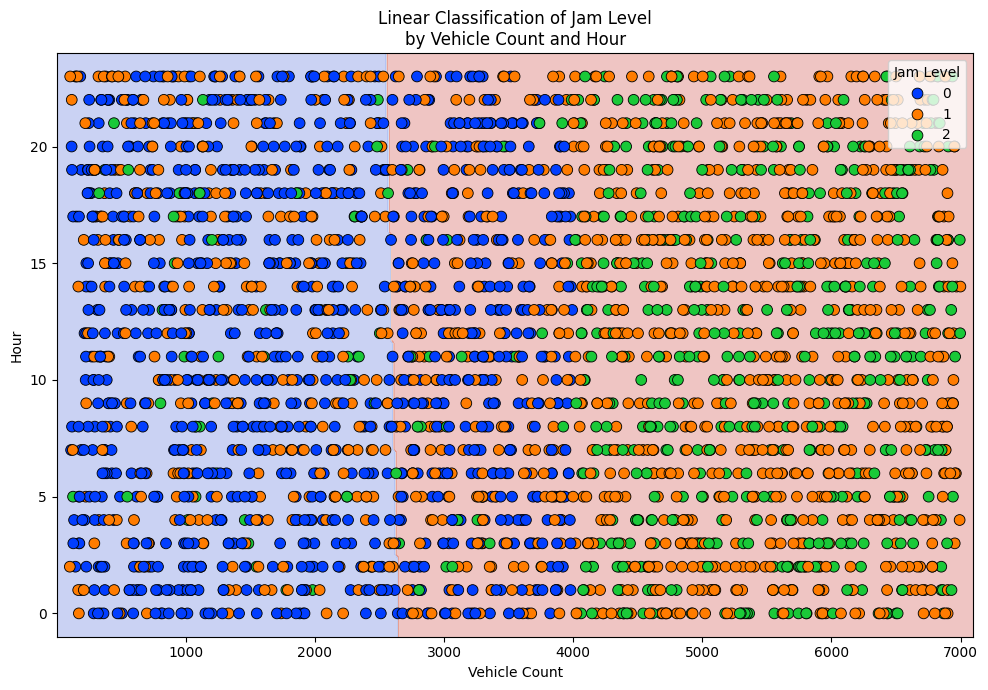

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the classification boundaries using 2 main features: vehicle_count and hour

from sklearn.linear_model import LogisticRegression

# We will only use two features so we can plot the decision boundaries clearly in 2D
features = ['vehicle_count', 'hour']
X_cls = df[features].values
y_cls = df['jam_level'].values

# Fit logistic regression for multiclass
lr = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
lr.fit(X_cls, y_cls)

# Create a mesh to plot decision boundary
x_min, x_max = X_cls[:, 0].min() - 100, X_cls[:, 0].max() + 100
y_min, y_max = X_cls[:, 1].min() - 1, X_cls[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 200))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter the real data points with class colors
palette = sns.color_palette('bright', len(np.unique(y_cls)))
sns.scatterplot(x=X_cls[:, 0], y=X_cls[:, 1], hue=y_cls, palette=palette, edgecolor='k', s=60)

plt.xlabel('Vehicle Count')
plt.ylabel('Hour')
plt.title('Linear Classification of Jam Level\nby Vehicle Count and Hour')
plt.legend(title='Jam Level', loc='upper right')
plt.tight_layout()
plt.show()


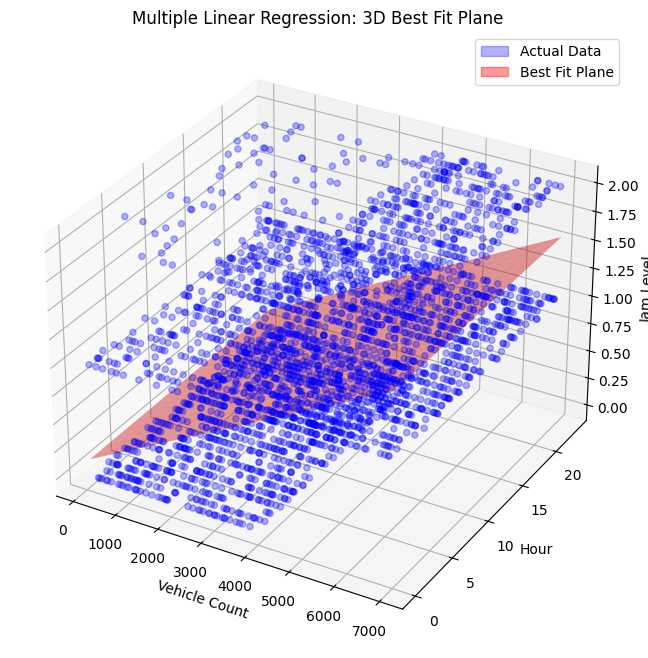

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy as np

# Use three features for 3D visualization
feature_cols_3d = ['vehicle_count', 'hour', 'humidity']
X_3d = df[feature_cols_3d].values
y = df['jam_level'].values

model = LinearRegression()
model.fit(X_3d, y)
y_pred = model.predict(X_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(X_3d[:, 0], X_3d[:, 1], y, c='b', label='Actual', alpha=0.3)

# To plot the best fit plane, we need a grid.
x_surf, y_surf = np.meshgrid(
    np.linspace(X_3d[:,0].min(), X_3d[:,0].max(), 20),
    np.linspace(X_3d[:,1].min(), X_3d[:,1].max(), 20)
)

# Prepare input for prediction
z_surf_input = np.c_[
    x_surf.ravel(),   # vehicle_count
    y_surf.ravel(),   # hour
    np.full_like(x_surf.ravel(), X_3d[:,2].mean()) # fix humidity at mean
]
z_surf = model.predict(z_surf_input).reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='r', alpha=0.4, label='Best Fit Plane')

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Hour')
ax.set_zlabel('Jam Level')
ax.set_title('Multiple Linear Regression: 3D Best Fit Plane')

# Custom legend since plot_surface does not support label
from matplotlib.patches import Patch
legend_proxies = [Patch(color='b', alpha=0.3, label='Actual Data'), Patch(color='r', alpha=0.4, label='Best Fit Plane')]
ax.legend(handles=legend_proxies, loc='best')

plt.show()


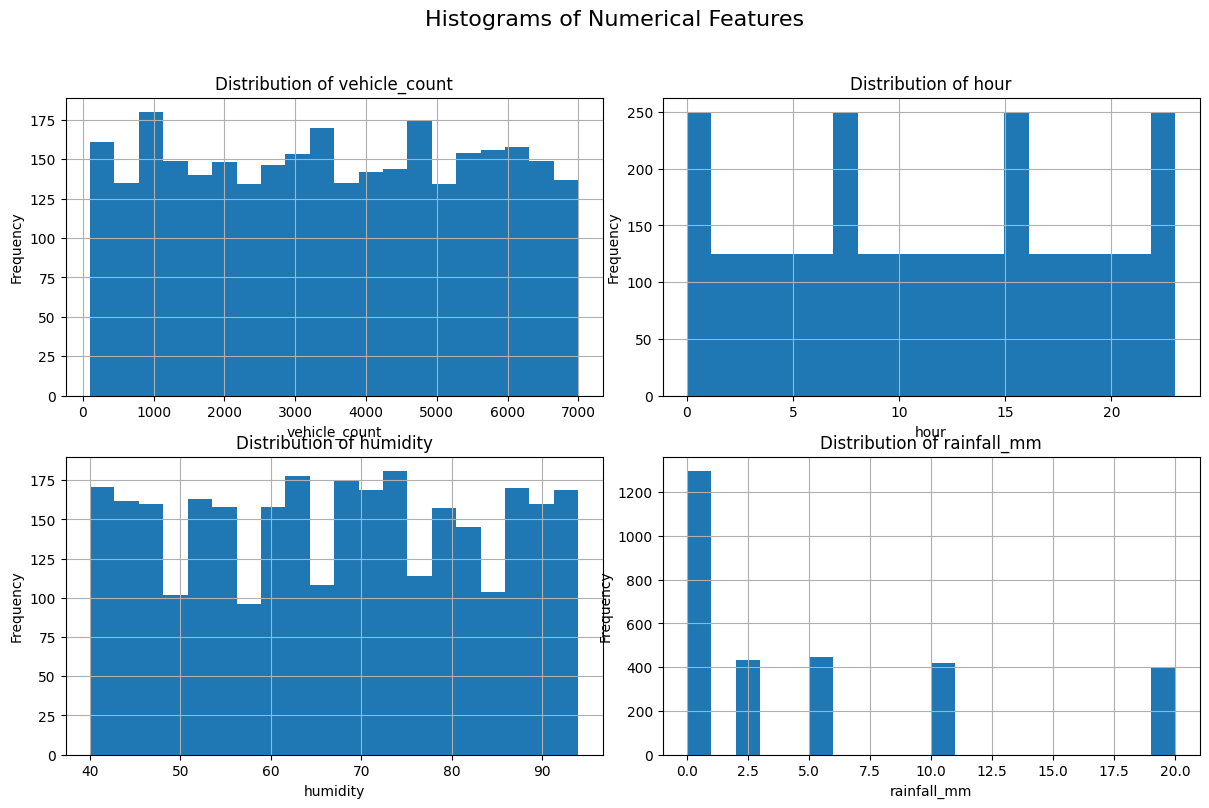

In [19]:
# Histograms for numerical features
num_features = ['vehicle_count', 'hour', 'humidity', 'rainfall_mm']
axes = df[num_features].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Add axis descriptions
for ax, feature in zip(axes.flatten(), num_features):
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
plt.show()

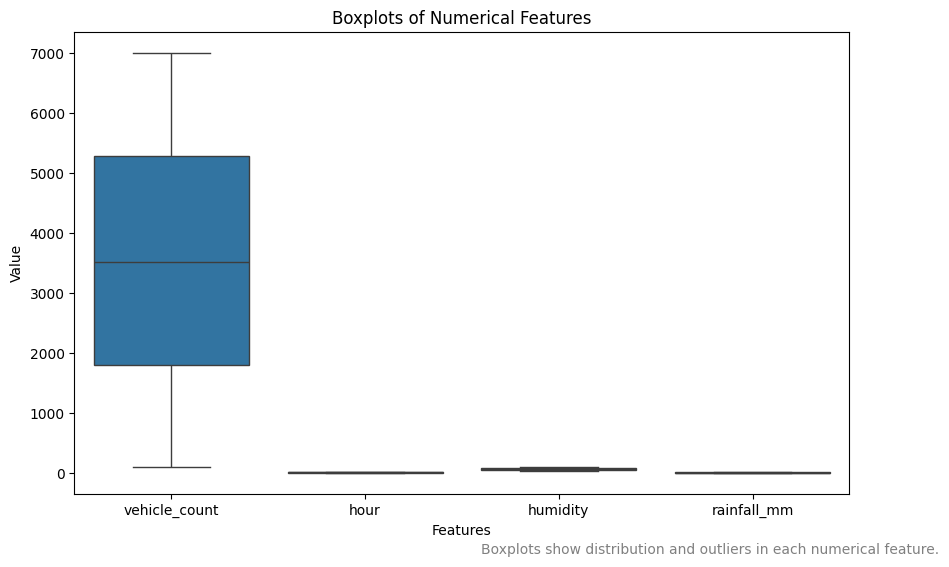

In [20]:
# Boxplots for numerical features (to check for outliers)
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_features])
plt.title('Boxplots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.figtext(0.99, 0.01, "Boxplots show distribution and outliers in each numerical feature.", 
            horizontalalignment='right', fontsize=10, color='gray')
plt.show()

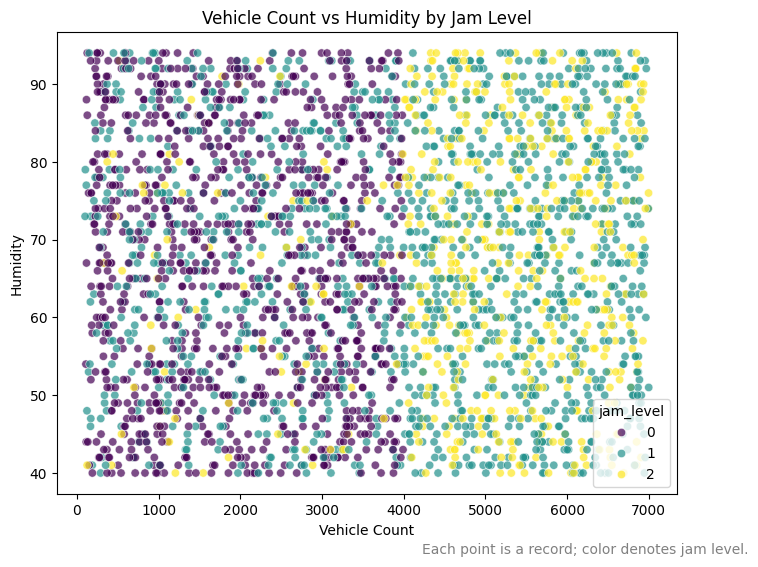

In [21]:
# Scatterplots for relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='vehicle_count', y='humidity', hue='jam_level', palette='viridis', alpha=0.7)
plt.title('Vehicle Count vs Humidity by Jam Level')
plt.xlabel('Vehicle Count')
plt.ylabel('Humidity')
plt.figtext(0.99, 0.01, "Each point is a record; color denotes jam level.", 
            horizontalalignment='right', fontsize=10, color='gray')
plt.show()

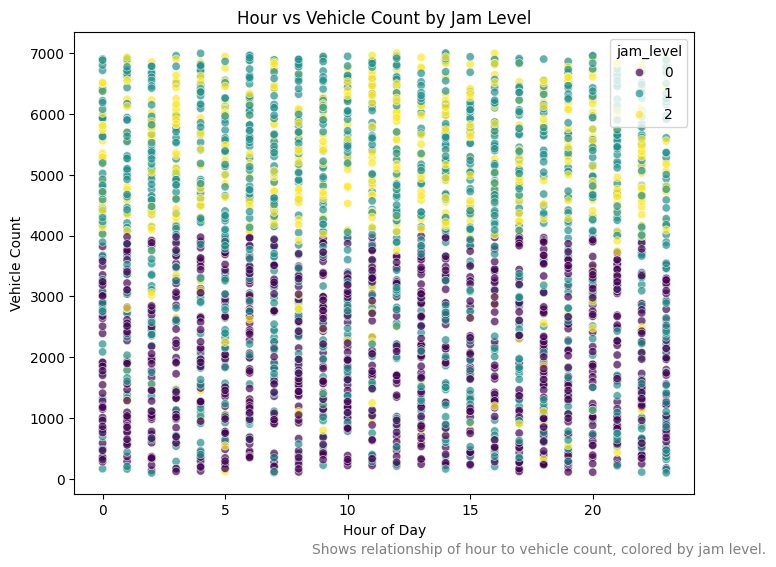

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='hour', y='vehicle_count', hue='jam_level', palette='viridis', alpha=0.7)
plt.title('Hour vs Vehicle Count by Jam Level')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.figtext(0.99, 0.01, "Shows relationship of hour to vehicle count, colored by jam level.", 
            horizontalalignment='right', fontsize=10, color='gray')
plt.show()


C:\Users\dostu\AppData\Local\Temp\ipykernel_24956\1977553449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='jam_level', y='vehicle_count', palette='Set3')


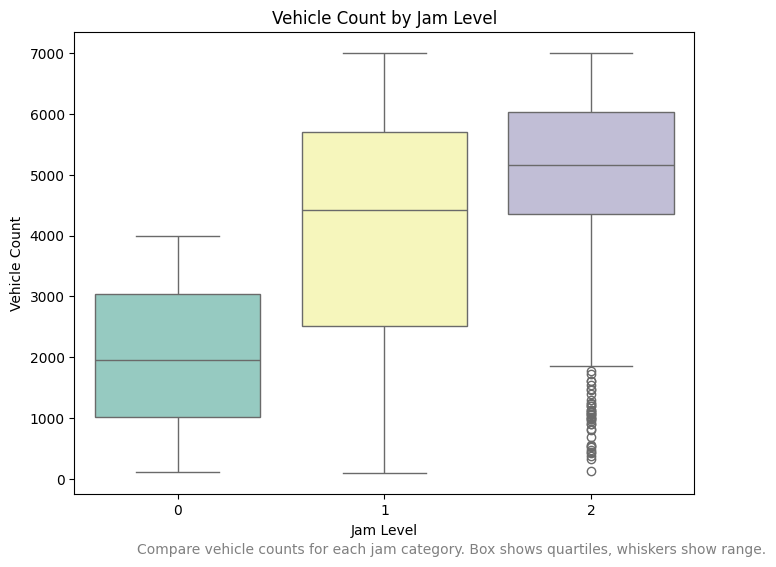

In [23]:
# Boxplot of vehicle_count grouped by jam level
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='jam_level', y='vehicle_count', palette='Set3')
plt.title('Vehicle Count by Jam Level')
plt.xlabel('Jam Level')
plt.ylabel('Vehicle Count')
plt.figtext(0.99, 0.01, "Compare vehicle counts for each jam category. Box shows quartiles, whiskers show range.", 
            horizontalalignment='right', fontsize=10, color='gray')
plt.show()


In [24]:
# Detect outliers in numerical features using the IQR method

def find_outliers_iqr(data, features):
    outlier_indices = dict()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
        outlier_indices[feature] = list(outliers)
        print(f"Feature '{feature}': Found {len(outliers)} outliers.")
    return outlier_indices

numerical_features = ['vehicle_count', 'hour', 'humidity', 'rainfall_mm']
outlier_indices = find_outliers_iqr(df, numerical_features)

# Optionally, show the indices or inspect rows with multiple outlier flags
import collections
all_outlier_indices = sum(outlier_indices.values(), [])
multi_feature_outliers = [item for item, count in collections.Counter(all_outlier_indices).items() if count > 1]
print(f"Rows that are outliers in multiple features: {multi_feature_outliers}")

# To display outlier rows (optional):
# display(df.loc[multi_feature_outliers])


Feature 'vehicle_count': Found 0 outliers.
Feature 'hour': Found 0 outliers.
Feature 'humidity': Found 0 outliers.
Feature 'rainfall_mm': Found 0 outliers.
Rows that are outliers in multiple features: []


In [25]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to standardize
numeric_features = ['hour','road_name' ,'weather', 'humidity', 'rainfall_mm', 'vehicle_count', 'year', 'month', 'day']

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_features] = scaler.fit_transform(df_standardized[numeric_features])

# To inspect the standardized data:
display(df_standardized.head())


,hour,weather,road_name,humidity,rainfall_mm,vehicle_count,jam_level,year,month,day
0,-1.661325,0.730214,0.0,0.690997,2.203345,1.457485,2,0.0,-1.325987,-1.580552
1,-1.516862,0.730214,0.0,1.511884,-0.756019,-0.884244,2,0.0,-1.325987,-1.580552
2,-1.372399,0.023327,0.0,0.059546,2.203345,-1.418649,1,0.0,-1.325987,-1.580552
3,-1.227936,0.023327,0.0,-0.824486,-0.016178,0.534970,2,0.0,-1.325987,-1.580552
4,-1.083473,-1.390447,0.0,0.943578,-0.756019,-0.848550,0,0.0,-1.325987,-1.580552


In [26]:
from sklearn.model_selection import train_test_split

# Define feature columns and target
feature_cols = ['hour','road_name' ,'weather', 'humidity', 'rainfall_mm', 'vehicle_count', 'year', 'month', 'day']
target_col = 'jam_level'

X = df[feature_cols]
y = df[target_col]

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (2400, 9)
Test set shape: (600, 9)


Random Forest Accuracy: 0.7566666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       208
           1       0.73      0.73      0.73       273
           2       0.88      0.50      0.63       119

    accuracy                           0.76       600
   macro avg       0.79      0.72      0.73       600
weighted avg       0.77      0.76      0.75       600



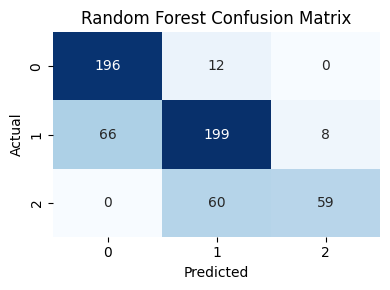

In [33]:

# Instantiate the Random Forest classifier using the required parameters
estimator = RandomForestClassifier()

# Fit the classifier to the training data
estimator.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = estimator.predict(X_test)

# Evaluate the predictions
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Confusion Matrix Visualization (small plot)
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


d:\Traffic Jam prediction\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [02:07:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.73
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       208
           1       0.70      0.71      0.70       273
           2       0.78      0.55      0.65       119

    accuracy                           0.73       600
   macro avg       0.74      0.71      0.72       600
weighted avg       0.73      0.73      0.73       600



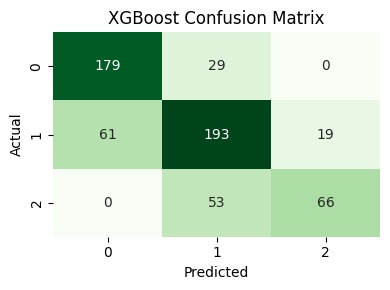

In [28]:
# XGBoost Multiclass Classification
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on test set
xgb_y_pred = xgb_clf.predict(X_test)

# Evaluate predictions
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))

# Confusion Matrix Visualization
cm_xgb = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 7
[LightGBM] [Info] Start training from score -1.061798
[LightGBM] [Info] Start training from score -0.787458
[LightGBM] [Info] Start training from score -1.613613
LightGBM Accuracy: 0.7183333333333334
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79       208
           1       0.69      0.70      0.69       273
           2       0.77      0.51      0.62       119

    accuracy                           0.72       600
   macro avg       0.73      0.69      0.70       600
weighted avg       0.72      0.72      0.71       600



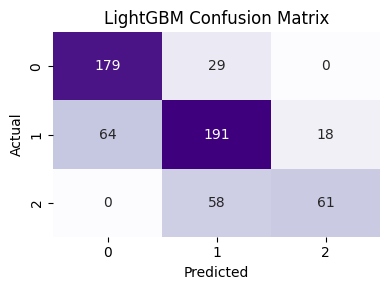

In [29]:
# LightGBM Multiclass Classification
from lightgbm import LGBMClassifier

# Instantiate the LightGBM classifier
lgbm_clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(y.unique()),
    random_state=42
)

# Train the model
lgbm_clf.fit(X_train, y_train)

# Predict on test set
lgbm_y_pred = lgbm_clf.predict(X_test)

# Evaluate predictions
print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_y_pred))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_y_pred))

# Confusion Matrix Visualization
cm_lgbm = confusion_matrix(y_test, lgbm_y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [36]:
import joblib

# Save the trained Random Forest model in .tkl format
joblib.dump(rf_y_pred, 'random_forest_model.tkl')


['random_forest_model.tkl']

In [37]:
# Save the trained Random Forest model for Flask webapp (correct way)
import joblib
joblib.dump(estimator, 'random_forest_model.joblib')
print('Model saved as random_forest_model.joblib')

Model saved as random_forest_model.joblib
